In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import datetime
from scipy.stats import linregress

In [2]:
# Import cattle counts excerpt created in abs_cattle_totals_2020_transform.ipynb
qld_data = pd.read_csv("data/abs_qld_cattle_counts_excerpt.csv")
qld_data.head()

,Unnamed: 0,Year,Queensland
0,14,1976,11036.0
1,15,1977,10856.0
2,16,1978,10261.0
3,17,1979,9756.0
4,18,1980,9359.0


In [3]:
# Check column names
qld_data.columns.to_list()

['Unnamed: 0', 'Year', 'Queensland']

In [4]:
# Only keep the year and herd size values
qld_cattle_final = qld_data[["Year", "Queensland"]]
qld_cattle_final.head()

,Year,Queensland
0,1976,11036.0
1,1977,10856.0
2,1978,10261.0
3,1979,9756.0
4,1980,9359.0


In [5]:
# Check data types
qld_cattle_final.dtypes

Year            int64
Queensland    float64
dtype: object

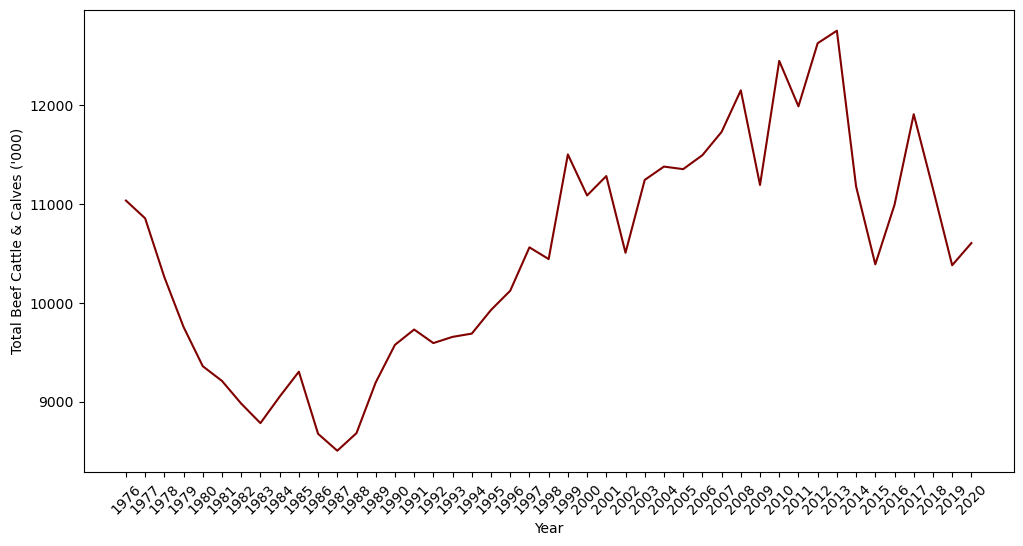

In [6]:
# Plot cattle numbers by year
x_values = qld_cattle_final["Year"]
y_values = qld_cattle_final["Queensland"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values, color="maroon")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0), rotation=45)
plt.xlabel("Year")
plt.ylabel("Total Beef Cattle & Calves ('000)")
plt.savefig("visuals/QLD_cattle_base.png")
plt.show()

In [7]:
# Import river dishcarge data created in ingest.ipynb
all_flood_data = pd.read_csv("data/flooddata.csv")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,33.20
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,31.58
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,30.41
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,29.48
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,28.85


In [8]:
# Convert "date" column to datetime
all_flood_data["date"] = all_flood_data["date"].astype("datetime64[ns]")

In [9]:
# Extract year from "date" column
all_flood_data['Year'] = all_flood_data["date"].dt.strftime("%Y")
all_flood_data.head()

,date,location,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge,Year
0,1990-01-01,Brisbane,-27.5,153.0,28.6,18.3,22.5,0.0,0.0,14.1,33.20,1990
1,1990-01-02,Brisbane,-27.5,153.0,29.3,17.0,22.9,0.0,0.0,13.4,31.58,1990
2,1990-01-03,Brisbane,-27.5,153.0,30.8,19.3,24.1,0.0,0.0,13.1,30.41,1990
3,1990-01-04,Brisbane,-27.5,153.0,35.5,18.5,26.0,0.0,0.0,16.8,29.48,1990
4,1990-01-05,Brisbane,-27.5,153.0,27.4,22.0,24.3,0.0,0.0,19.4,28.85,1990


In [10]:
# Calculate average river discharge by year
all_flood_data_yearly = all_flood_data.groupby("Year").mean(numeric_only=True)
all_flood_data_yearly

,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
Year,,,,,,,,,
1990,-23.5795,150.206,25.977260,17.962329,21.552603,3.363973,3.389041,16.880000,402.628781
1991,-23.5795,150.206,26.531918,18.077397,21.882877,2.204932,2.954795,16.289178,934.734438
1992,-23.5795,150.206,26.281831,18.205874,21.832240,1.855464,2.711749,16.058880,52.246462
1993,-23.5795,150.206,26.205342,18.390000,21.901918,1.146712,2.500000,16.522877,18.876233
1994,-23.5795,150.206,26.341233,17.762740,21.616575,1.203151,2.265753,16.928904,30.432151
1995,-23.5795,150.206,26.476575,18.384521,22.001233,1.908904,2.710959,16.758493,56.108959
1996,-23.5795,150.206,26.322814,18.098087,21.808743,2.446311,3.905738,16.830055,93.890902
1997,-23.5795,150.206,25.965068,18.229726,21.725890,2.112329,2.939726,16.271233,279.819315
1998,-23.5795,150.206,26.261781,19.037808,22.300274,2.734247,3.842466,15.990959,334.649096


In [11]:
# Reset the index
all_flood_data_yearly.reset_index(inplace=True)
all_flood_data_yearly.head()

,Year,latitude,longitude,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,precipitation_hours,windspeed_10m_max,river_discharge
0,1990,-23.5795,150.206,25.977260,17.962329,21.552603,3.363973,3.389041,16.880000,402.628781
1,1991,-23.5795,150.206,26.531918,18.077397,21.882877,2.204932,2.954795,16.289178,934.734438
2,1992,-23.5795,150.206,26.281831,18.205874,21.832240,1.855464,2.711749,16.058880,52.246462
3,1993,-23.5795,150.206,26.205342,18.390000,21.901918,1.146712,2.500000,16.522877,18.876233
4,1994,-23.5795,150.206,26.341233,17.762740,21.616575,1.203151,2.265753,16.928904,30.432151


In [12]:
# Keep only the Year and River Discharge values
all_qld_av_discharge = all_flood_data_yearly[["Year", "river_discharge"]]
all_qld_av_discharge

,Year,river_discharge
0,1990,402.628781
1,1991,934.734438
2,1992,52.246462
3,1993,18.876233
4,1994,30.432151
5,1995,56.108959
6,1996,93.890902
7,1997,279.819315
8,1998,334.649096
9,1999,176.706493


In [13]:
# Chech data types
all_qld_av_discharge.dtypes

Year                object
river_discharge    float64
dtype: object

In [14]:
# Covert Year values to integer
all_qld_av_discharge=all_qld_av_discharge.apply(pd.to_numeric, errors="coerce")

In [15]:
# Check data frame still looks right
all_qld_av_discharge.head()

,Year,river_discharge
0,1990,402.628781
1,1991,934.734438
2,1992,52.246462
3,1993,18.876233
4,1994,30.432151


In [16]:
# Check data types to make sure conversion worked
all_qld_av_discharge.dtypes

Year                 int64
river_discharge    float64
dtype: object

In [17]:
# Merge the stock number by year and average annual river discharge dataframes 
# based on years included in river discharge dataframe
all_herd_vs_discharge = pd.merge(all_qld_av_discharge, qld_cattle_final, on="Year", how="left" )
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,402.628781,9575.20
1,1991,934.734438,9730.40
2,1992,52.246462,9593.20
3,1993,18.876233,9656.10
4,1994,30.432151,9689.10
5,1995,56.108959,9928.30
6,1996,93.890902,10123.00
7,1997,279.819315,10562.30
8,1998,334.649096,10443.60
9,1999,176.706493,11502.60


In [18]:
# Drop null values
all_herd_vs_discharge.dropna(how="any", inplace=True)
all_herd_vs_discharge

,Year,river_discharge,Queensland
0,1990,402.628781,9575.20
1,1991,934.734438,9730.40
2,1992,52.246462,9593.20
3,1993,18.876233,9656.10
4,1994,30.432151,9689.10
5,1995,56.108959,9928.30
6,1996,93.890902,10123.00
7,1997,279.819315,10562.30
8,1998,334.649096,10443.60
9,1999,176.706493,11502.60


In [19]:
# Rename column
all_herd_vs_discharge.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_discharge.head()

,Year,river_discharge,Herd Size
0,1990,402.628781,9575.2
1,1991,934.734438,9730.4
2,1992,52.246462,9593.2
3,1993,18.876233,9656.1
4,1994,30.432151,9689.1


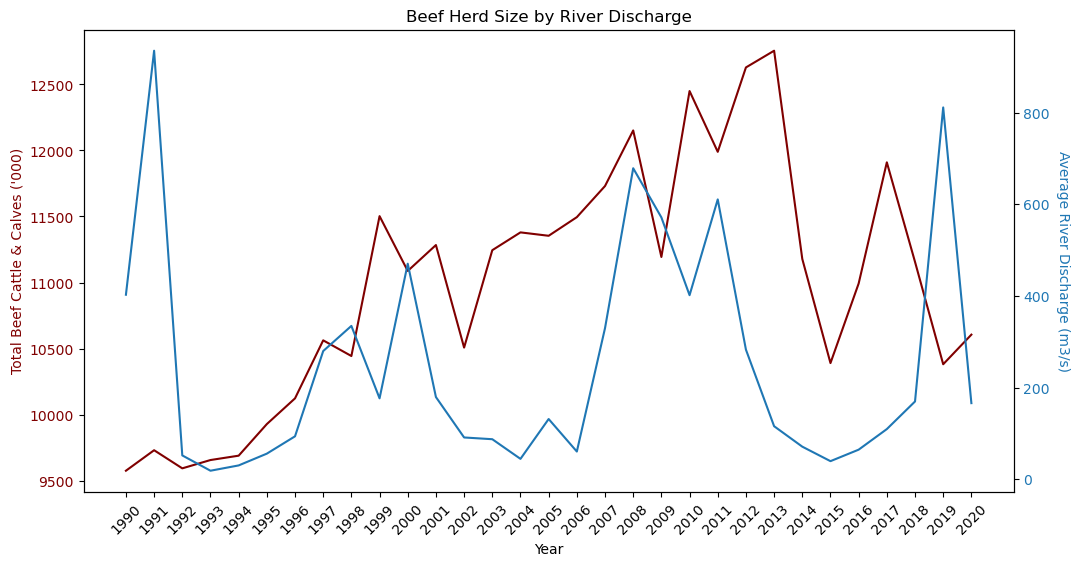

In [20]:
# Plot cattle numbers vs river discharge on the same graph
all_x_values = all_herd_vs_discharge["Year"]
all_y_values_1 = all_herd_vs_discharge["Herd Size"]
all_y_values_2 = all_herd_vs_discharge["river_discharge"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(all_x_values), max(all_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(all_x_values, all_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average River Discharge (m3/s)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(all_x_values, all_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by River Discharge")

# Save plot as png
plt.savefig("visuals/herd_by_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()


In [21]:
# Using original groupby weather dataframe, choose Year and Rain values
all_qld_av_rain = all_flood_data_yearly[["Year", "precipitation_sum"]]
all_qld_av_rain

,Year,precipitation_sum
0,1990,3.363973
1,1991,2.204932
2,1992,1.855464
3,1993,1.146712
4,1994,1.203151
5,1995,1.908904
6,1996,2.446311
7,1997,2.112329
8,1998,2.734247
9,1999,2.717123


In [22]:
# Check data types
all_qld_av_rain.dtypes

Year                  object
precipitation_sum    float64
dtype: object

In [23]:
# Convert Year values to integer
all_qld_av_rain=all_qld_av_rain.apply(pd.to_numeric, errors="coerce")

In [24]:
# Merge the average rain and cattle numbers dataframes,
# based on Year values in average rain dataframe
all_herd_vs_rain = pd.merge(all_qld_av_rain, qld_cattle_final, on="Year", how="left" )
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.363973,9575.20
1,1991,2.204932,9730.40
2,1992,1.855464,9593.20
3,1993,1.146712,9656.10
4,1994,1.203151,9689.10
5,1995,1.908904,9928.30
6,1996,2.446311,10123.00
7,1997,2.112329,10562.30
8,1998,2.734247,10443.60
9,1999,2.717123,11502.60


In [25]:
# Drop null values
all_herd_vs_rain.dropna(how="any", inplace=True)
all_herd_vs_rain

,Year,precipitation_sum,Queensland
0,1990,3.363973,9575.20
1,1991,2.204932,9730.40
2,1992,1.855464,9593.20
3,1993,1.146712,9656.10
4,1994,1.203151,9689.10
5,1995,1.908904,9928.30
6,1996,2.446311,10123.00
7,1997,2.112329,10562.30
8,1998,2.734247,10443.60
9,1999,2.717123,11502.60


In [26]:
# Rename column
all_herd_vs_rain.rename(columns={"Queensland": "Herd Size"}, inplace=True)
all_herd_vs_rain.head()

,Year,precipitation_sum,Herd Size
0,1990,3.363973,9575.2
1,1991,2.204932,9730.4
2,1992,1.855464,9593.2
3,1993,1.146712,9656.1
4,1994,1.203151,9689.1


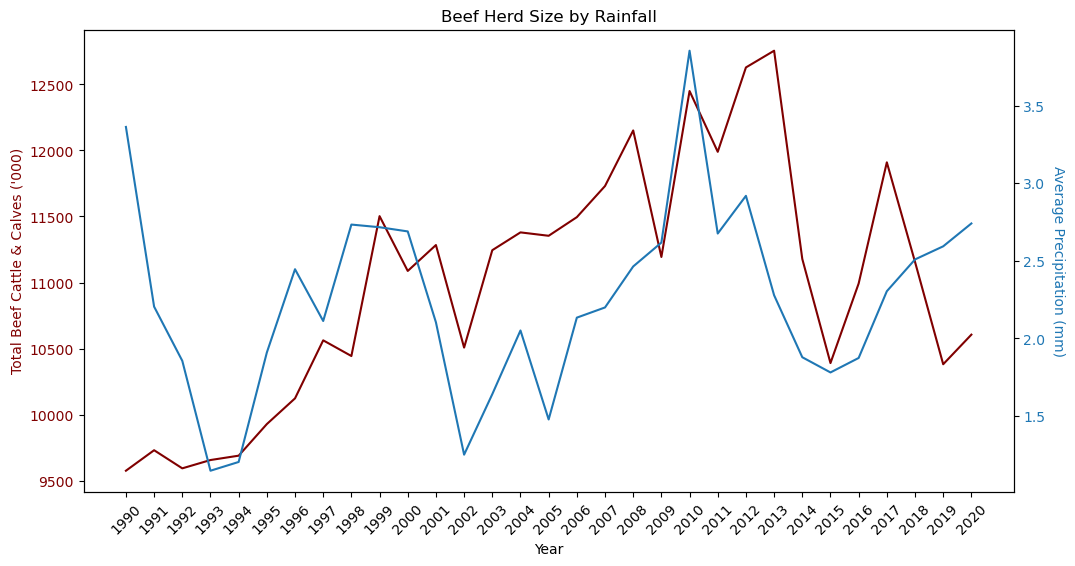

In [27]:
# Plot cattle numbers vs average rain on the same chart
rain_x_values = all_herd_vs_rain["Year"]
rain_y_values_1 = all_herd_vs_rain["Herd Size"]
rain_y_values_2 = all_herd_vs_rain["precipitation_sum"]


# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(rain_x_values), max(rain_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(rain_x_values, rain_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Precipitation (mm)", rotation=270, va="bottom", color="tab:blue")
ax2.plot(rain_x_values, rain_y_values_2, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Set plot title
plt.title("Beef Herd Size by Rainfall")

# Save plot as png
plt.savefig("visuals/herd_by_rain.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

In [28]:
# Import saleyard meat prices file
saleyard_prices = pd.read_csv("Data/abs_meat_prices_saleyard_prices_excerpt.csv")
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
0,NaN,c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw),c/kg (cw)
1,1991.0,227,220,175,203,121,11.2,214
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216


In [29]:
# Check data types
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling       object
Ox b           object
Cow c          object
average d      object
Lamb e         object
Mutton g       object
Pig h          object
dtype: object

In [30]:
# Drop the first row
saleyard_prices.drop(saleyard_prices.index[0:2],inplace=True)
saleyard_prices.reset_index()
saleyard_prices

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992.0,224,228,172,202,131,28.9,196
3,1993.0,238,254,182,219,185,34.3,213
4,1994.0,255,246,184,221,146,34.1,202
5,1995.0,235,218,166,200,192,68.4,213
6,1996.0,181,164,128,154,234,67.7,247
7,1997.0,188,188,134,163,199,75.2,219
8,1998.0,204,206,157,180,178,79,180
9,1999.0,227,217,183,203,204,60.9,216
10,2000.0,261,246,219,237,170,71.8,249
11,2001.0,330,318,289,307,262,146,276


In [31]:
# Check column names
saleyard_prices.columns.to_list()

['Unnamed: 0',
 'Yearling',
 'Ox b',
 'Cow c',
 'average d',
 'Lamb e',
 'Mutton g',
 'Pig h']

In [32]:
# Convert all non-numeric values to numeric
saleyard_prices=saleyard_prices.apply(pd.to_numeric, errors="coerce")

In [33]:
saleyard_prices.dtypes

Unnamed: 0    float64
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [34]:
# Convert column with Year values to integer
saleyard_prices["Unnamed: 0"] = saleyard_prices["Unnamed: 0"].astype(int)

In [35]:
# Check data types now
saleyard_prices.dtypes

Unnamed: 0      int32
Yearling        int64
Ox b            int64
Cow c           int64
average d       int64
Lamb e          int64
Mutton g      float64
Pig h           int64
dtype: object

In [36]:
# Check dataframe still looks right
saleyard_prices.head()

,Unnamed: 0,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [37]:
# Rename Year column
saleyard_prices = saleyard_prices.rename(columns={"Unnamed: 0": "Year"})
saleyard_prices.head()

,Year,Yearling,Ox b,Cow c,average d,Lamb e,Mutton g,Pig h
2,1992,224,228,172,202,131,28.9,196
3,1993,238,254,182,219,185,34.3,213
4,1994,255,246,184,221,146,34.1,202
5,1995,235,218,166,200,192,68.4,213
6,1996,181,164,128,154,234,67.7,247


In [38]:
# Keep only year and yearling prices columns
beef_prices = saleyard_prices[["Year", "Yearling"]]
beef_prices

,Year,Yearling
2,1992,224
3,1993,238
4,1994,255
5,1995,235
6,1996,181
7,1997,188
8,1998,204
9,1999,227
10,2000,261
11,2001,330


In [39]:
# Merge the yearling prices and cattle numbers dataframes,
# based on the year values in the yearling prices dataframe
herd_vs_price = pd.merge(beef_prices, qld_cattle_final, on="Year", how="left")
herd_vs_price

,Year,Yearling,Queensland
0,1992,224,9593.20
1,1993,238,9656.10
2,1994,255,9689.10
3,1995,235,9928.30
4,1996,181,10123.00
5,1997,188,10562.30
6,1998,204,10443.60
7,1999,227,11502.60
8,2000,261,11087.60
9,2001,330,11283.80


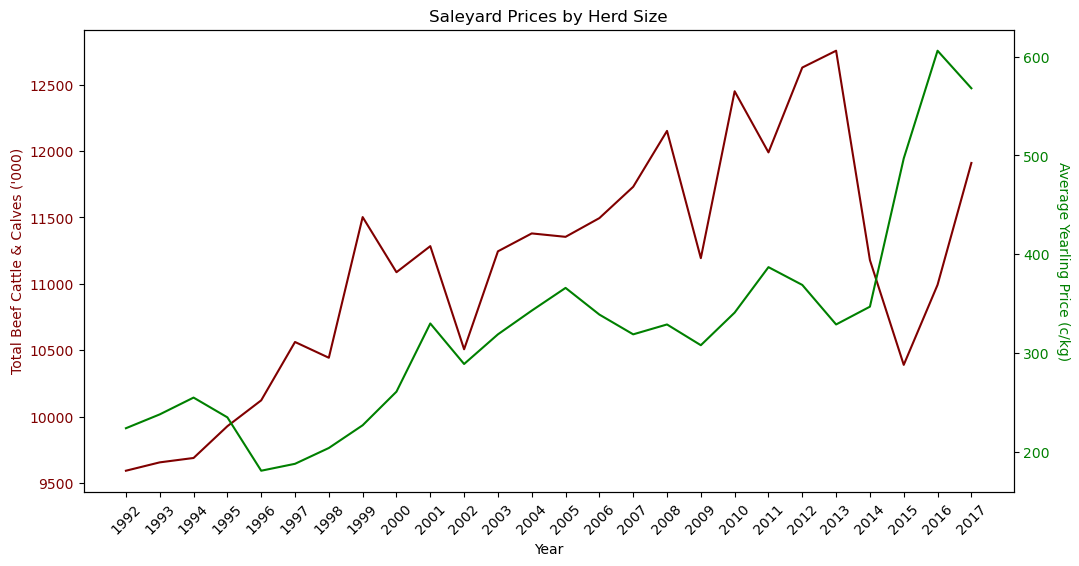

In [40]:
# Plot cattle numbers vs average rain on the same chart
price_x_values = herd_vs_price["Year"]
price_y_values_1 = herd_vs_price["Queensland"]
price_y_values_2 = herd_vs_price["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_x_values), max(price_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Beef Cattle & Calves ('000)", color="maroon")
ax1.plot(price_x_values, price_y_values_1, color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_x_values, price_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by Herd Size")

# Save plot as png
plt.savefig("visuals/prices_by_herd.png")

# Set plot layout and display
fig.tight_layout()
plt.show()

In [41]:
# Merge the yearling prices and river discharge dataframes,
# based on teh year values in the yearling prices dataframe
prices_vs_flood = pd.merge(beef_prices, all_qld_av_discharge, on="Year", how="left")
prices_vs_flood

,Year,Yearling,river_discharge
0,1992,224,52.246462
1,1993,238,18.876233
2,1994,255,30.432151
3,1995,235,56.108959
4,1996,181,93.890902
5,1997,188,279.819315
6,1998,204,334.649096
7,1999,227,176.706493
8,2000,261,470.327363
9,2001,330,179.500466


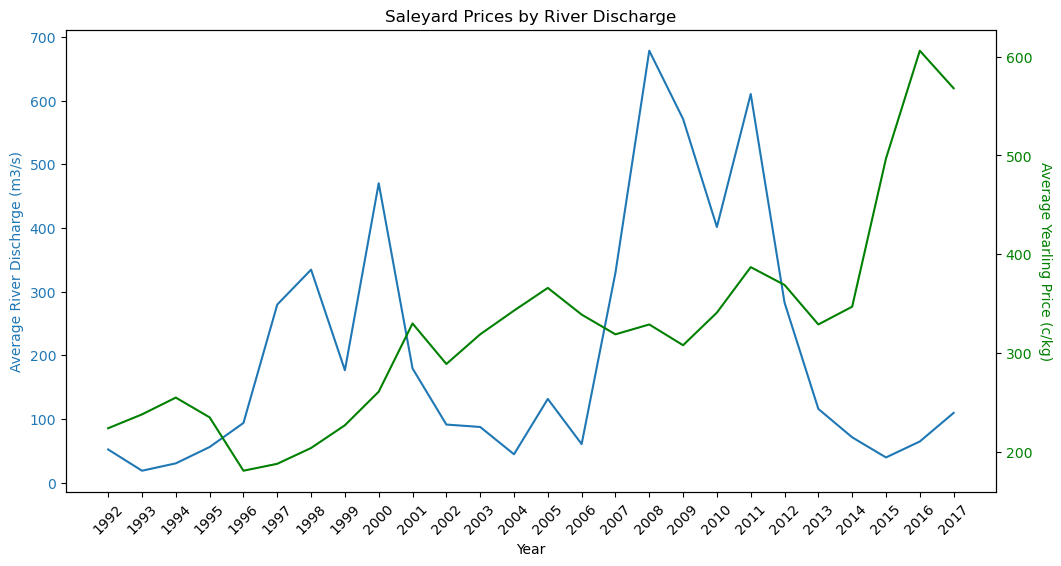

In [42]:
# Plot cattle numbers vs average rain on the same chart
price_flood_x_values = prices_vs_flood["Year"]
price_flood_y_values_1 = prices_vs_flood["river_discharge"]
price_flood_y_values_2 = prices_vs_flood["Yearling"]

# Set figure and xtick patameters
fig1, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(np.arange(min(price_flood_x_values), max(price_flood_x_values)+1, 1.0), rotation=45)

# Set x-axis and first y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Average River Discharge (m3/s)", color="tab:blue")
ax1.plot(price_flood_x_values, price_flood_y_values_1, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Set x-axis to be shared by both y-axes
ax2 = ax1.twinx()

# Set second y-axis
ax2.set_ylabel("Average Yearling Price (c/kg)", rotation=270, va="bottom", color="green")
ax2.plot(price_flood_x_values, price_flood_y_values_2, color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Set plot title
plt.title("Saleyard Prices by River Discharge")

# Save plot as png
plt.savefig("visuals/prices_by_flood.png")

# Set plot layout and display
fig.tight_layout()
plt.show()